In [2]:
import neurokit2 as nk

In [ ]:
import numpy as np
import pandas as pd

save_path = "/home/jovyan"

duration = 10
#sampling_rate = 100
sampling_rate = 20
heart_rate = 200
respiratory_rate = 15
# EDA
scr_number = 10
# EMG
burst_number = 10

# Generate synthetic signals
ecg = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=heart_rate)
ppg = nk.ppg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=heart_rate)
rsp = nk.rsp_simulate(duration=duration, sampling_rate=sampling_rate, respiratory_rate=respiratory_rate)
eda = nk.eda_simulate(duration=duration, sampling_rate=sampling_rate, scr_number=scr_number)
emg = nk.emg_simulate(duration=duration, sampling_rate=sampling_rate, burst_number=burst_number)
eda = eda[:len(ecg)]

# Visualise biosignals
data = pd.DataFrame({"ECG": ecg,
                     "PPG": ppg,
                     "RSP": rsp,
                     "EDA": eda,
                     "EMG": emg})
nk.signal_plot(data, subplots=True)

In [100]:
# create a time delta list for each signal
def time_delta(samples, delta, noise_range_percentage = 1):
    dt_list = [delta] * samples
    noise_number = (delta) / 100 * noise_range_percentage
    noise_range = (-noise_number,noise_number)
    dt_list_noisy = [x + np.random.uniform(*noise_range) for x in dt_list]
    return dt_list, dt_list_noisy

In [101]:
delta = 100 / sampling_rate # milliseconds
dt_list, dt_list_noisy = time_delta(len(ecg), delta, noise_range_percentage=1)

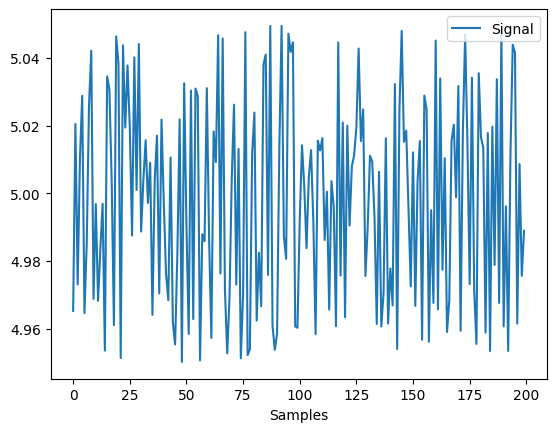

In [102]:
nk.signal_plot(dt_list_noisy)

In [103]:
time_deltas = np.array(dt_list) # or dt_list_noisy

In [104]:
# saves the signals and the time deltas to csv files
for i, (key, signal) in enumerate(data.items()):
    signal = np.array(signal)
    combined = np.column_stack((signal, time_deltas))
    np.savetxt(f"{save_path}/{key}.csv", combined, delimiter=",")
    print(f"Saved {key} signal to {save_path}/{key}.csv")

Saved ECG signal to /home/jovyan/ECG.csv
Saved PPG signal to /home/jovyan/PPG.csv
Saved RSP signal to /home/jovyan/RSP.csv
Saved EDA signal to /home/jovyan/EDA.csv
Saved EMG signal to /home/jovyan/EMG.csv
